<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explorando-Dados" data-toc-modified-id="Explorando-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explorando Dados</a></span><ul class="toc-item"><li><span><a href="#Investigando-Valores" data-toc-modified-id="Investigando-Valores-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Investigando Valores</a></span></li><li><span><a href="#Investigando-Tempo" data-toc-modified-id="Investigando-Tempo-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Investigando Tempo</a></span></li><li><span><a href="#Valores-Iguais" data-toc-modified-id="Valores-Iguais-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Valores Iguais</a></span></li><li><span><a href="#Valores-Acima-da-Média" data-toc-modified-id="Valores-Acima-da-Média-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Valores Acima da Média</a></span></li></ul></li><li><span><a href="#Normalização" data-toc-modified-id="Normalização-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Normalização</a></span></li><li><span><a href="#Reamostragem" data-toc-modified-id="Reamostragem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reamostragem</a></span></li><li><span><a href="#Separando-Dados" data-toc-modified-id="Separando-Dados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Separando Dados</a></span><ul class="toc-item"><li><span><a href="#Dataset-Original" data-toc-modified-id="Dataset-Original-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dataset Original</a></span></li><li><span><a href="#Dataset-Under-Sampled" data-toc-modified-id="Dataset-Under-Sampled-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Dataset Under-Sampled</a></span></li></ul></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Treinando Modelo</a></span><ul class="toc-item"><li><span><a href="#Regressão-Logística" data-toc-modified-id="Regressão-Logística-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Regressão Logística</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#SVC-Classifier" data-toc-modified-id="SVC-Classifier-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>SVC Classifier</a></span></li><li><span><a href="#KNN-Classifier" data-toc-modified-id="KNN-Classifier-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>KNN Classifier</a></span></li><li><span><a href="#MLP-Classifier" data-toc-modified-id="MLP-Classifier-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>MLP Classifier</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Confusion Matrix</a></span><ul class="toc-item"><li><span><a href="#Treino-Under-Sampling" data-toc-modified-id="Treino-Under-Sampling-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Treino Under Sampling</a></span></li></ul></li></ul></li></ul></div>

Este notebook é responsável por alocar o desenvolvimento e a investigação de um conjunto de dados do [Kaggle](https://www.kaggle.com/) contendo informações sobre transações de cartões de crédito para [identificação de fraude](https://www.kaggle.com/mlg-ulb/creditcardfraud).

<img src="credit_card_fraud_background.png" alt="Credit Card Fraud Background" style="width: 750px;"/>

No contexto desse problema de identificação de transações fraudulentas relacionadas ao uso de cartões de crédito, temos um conjunto de dados exemplificando transações realizadas durante dois dias de Setembro de 2013 por titulares europeus. Os dados foram coletados apresentam 492 transações fraudulentas em um total de 284.807 amostras. Isto mostra que o conjunto é altamente desbalanceado, apresentando exemplos da classe positiva (fraude) em apenas 0.172% do total de transações.

Além disso, temos um total 30 features onde 28 delas foram geradas a partir de um procedimento de PCA e, por critérios de segurança e sigilo, não foram providas informações adicionais sobre as mesmas. As duas features restantes representam, respectivamente:

* **Time:** Segundos entre cada transação e a primeira transação do dataset;
* **Amount:** Valor da Transação.

Para avaliação do modelo, é recomendado o uso de AUC ROC (Area Under the Curve - ROC), uma vez que acurácias por matriz de confusão não são boas em dados desbalanceados.

## Explorando Dados

In [1]:
# Importando biblioteca
import pandas as pd

# Lendo dados
df = pd.read_csv('creditcard.csv')

# Verificando
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [2]:
# Verificando quantidades
df.shape

(284807, 31)

In [3]:
print(f'O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset contém 284807 linhas e 31 colunas.


In [4]:
# Dados nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Investigando Valores

In [5]:
# Estatísticas sobre o Valor
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

O espectro de valores vai desde transações com $\$0,00$ até transações de $\$25.691,16$. O valor médio é de $\$88,34$

Apenas por curiosidade, vamos investigar quantas transações possuem valor nulo ($\$0,00$)

In [6]:
# Transações zeradas
zero_amount = df[df['Amount']==0]
zero_amount.head()

Time        V1        V2        V3        V4        V5        V6  \
383  282.0 -0.356466  0.725418  1.971749  0.831343  0.369681 -0.107776   
514  380.0 -1.299837  0.881817  1.452842 -1.293698 -0.025105 -1.170103   
534  403.0  1.237413  0.512365  0.687746  1.693872 -0.236323 -0.650232   
541  406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
575  430.0 -1.860258 -0.629859  0.966570  0.844632  0.759983 -1.481173   

           V7        V8        V9  ...         V21       V22       V23  \
383  0.751610 -0.120166 -0.420675  ...    0.020804  0.424312 -0.015989   
514  0.861610 -0.193934  0.592001  ...   -0.272563 -0.360853  0.223911   
534  0.118066 -0.230545 -0.808523  ...   -0.077543 -0.178220  0.038722   
541 -2.537387  1.391657 -2.770089  ...    0.517232 -0.035049 -0.465211   
575 -0.509681  0.540722 -0.733623  ...    0.268028  0.125515 -0.225029   

          V24       V25       V26       V27       V28  Amount  Class  
383  0.466754 -0.809962  0.657334 -0.043150 -0.046401     0.0      0  
514  0.598930 -0.397705  0.637141  0.234872  0.021379     0.0      0  
534  0.471218  0.289249  0.871803 -0.066884  0.012986     0.0      0  
541  0.320198  0.044519  0.177840  0.261145 -0.143276     0.0      1  
575  0.586664 -0.031598  0.570168 -0.043007 -0.223739     0.0      0  

[5 rows x 31 columns]

In [7]:
# Quantas transações com valor zerado?
zero_amount.shape[0]

1825

Algum insight pode ser tirado de transações fraudulentas sem nenhum valor envolvido?

In [8]:
# Transações zeradas e fraudulentas
zero_amount_fraud = zero_amount[zero_amount['Class']==1]
zero_amount_fraud.head()

Time         V1        V2         V3        V4        V5        V6  \
541      406.0  -2.312227  1.951992  -1.609851  3.997906 -0.522188 -1.426545   
8842   12093.0  -4.696795  2.693867  -4.475133  5.467685 -1.556758 -1.549420   
23308  32686.0   0.287953  1.728735  -1.652173  3.813544 -1.090927 -0.984745   
42756  41233.0 -10.645800  5.918307 -11.671043  8.807369 -7.975501 -3.586806   
69980  53658.0  -1.739341  1.344521  -0.534379  3.195291 -0.416196 -1.261961   

              V7        V8        V9  ...         V21       V22       V23  \
541    -2.537387  1.391657 -2.770089  ...    0.517232 -0.035049 -0.465211   
8842   -4.104215  0.553934 -1.498468  ...    0.573898 -0.080163  0.318408   
23308  -2.202318  0.555088 -2.033892  ...    0.262202 -0.633528  0.092891   
42756 -13.616797  6.428169 -7.368451  ...    2.571970  0.206809 -1.667801   
69980  -2.340991  0.713004 -1.416265  ...    0.383180 -0.213952 -0.336640   

            V24       V25       V26       V27       V28  Amount  Class  
541    0.320198  0.044519  0.177840  0.261145 -0.143276     0.0      1  
8842  -0.245862  0.338238  0.032271 -1.508458  0.608075     0.0      1  
23308  0.187613  0.368708 -0.132474  0.576561  0.309843     0.0      1  
42756  0.558419 -0.027898  0.354254  0.273329 -0.152908     0.0      1  
69980  0.237076  0.246003 -0.044228  0.510729  0.220952     0.0      1  

[5 rows x 31 columns]

In [9]:
# Quantas?
zero_amount_fraud.shape[0]

27

Interessante pensar em transações com valores zerados. Mais interessante ainda é pensar em transações zeradas **e** fraudulentas. Qual seria a respectiva porcentagem do total?

In [10]:
# Total de transações fraudulentas
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# Porcentagem de transações zeradas e fraudulentas
total_fraud = df['Class'].value_counts()[1]
total_zero_amount_fraud = zero_amount_fraud.shape[0]

perc_zero_amount_fraud = total_zero_amount_fraud / total_fraud
print(f'Do total de fraudes, temos {100*perc_zero_amount_fraud:.2f}% com valor \
$0,00 nas transações.')

Do total de fraudes, temos 5.49% com valor $0,00 nas transações.


Um número considerável? Precisamos entender, em primeiro lugar, o que seriam transações com valores nulos.

Vamos tentar retirar algum insight de transações de classes positiva (fraudulentas) e negativas (normal).

In [12]:
# Indexando dataframe
fraud_transactions = df.query('Class == 1')
normal_transactions = df.query('Class == 0')

In [13]:
# O número de amostras bate?
print(f'Transações fraudulentas: {fraud_transactions.shape[0]}')
print(f'Transações normais: {normal_transactions.shape[0]}')

Transações fraudulentas: 492
Transações normais: 284315


In [14]:
# Estatísticas sobre valores de transações fraudulentas
fraud_transactions['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# Estatística sobre valores de transações normais
normal_transactions['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Numericamente, é possível afirmar que a média de valores de transações consideradas normais, é de $\$88.29$, enquanto o valor médio de transações fraudulentas é de $\$122.21$

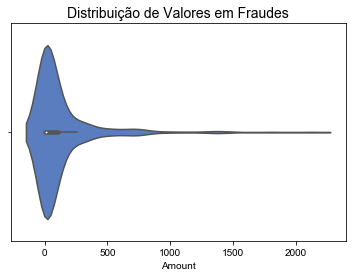

In [16]:
# Visualizando graficamente
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Preparando gráfico
fig, ax = plt.subplots()
sns.set(style='darkgrid', palette='muted')
ax = sns.violinplot(x='Amount', data=fraud_transactions)
ax.set_title('Distribuição de Valores em Fraudes', size=14)
plt.show()

Os valores não são balanceados, ou seja, temos uma concentração de transações entre 0 e 250, mas também temos valores elevados de transações, dificultando assim a visualização gráfica. Vamos ver a distribuição de valores de transações fraudulentas.

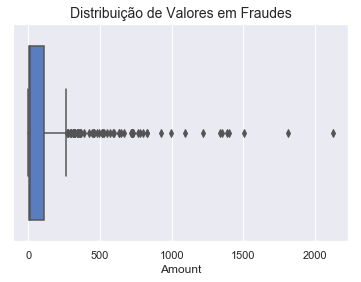

In [17]:
# Boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(fraud_transactions['Amount'])
ax.set_title('Distribuição de Valores em Fraudes', size=14)
plt.show()

Realmente fica difícil de visualizar um comportamento relacionado ao valor das transações graficamente.

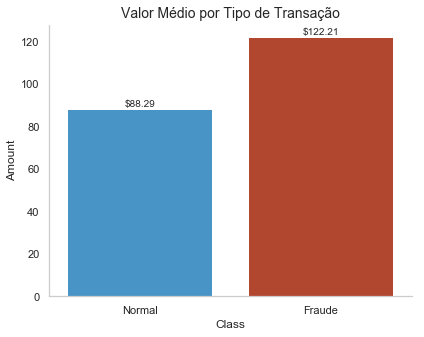

In [18]:
# Visualizando valor médio
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    função responsável por retirar bordas do gráfico e personalizar cor:
    input:
        ax: eixo do gráfico"""
    
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
custom_colors = ["#3498db", "#C8391A"]
fig, ax = plt.subplots()
ax = sns.barplot(x='Class', y='Amount', data=df,
                 palette=custom_colors, ci=None)
format_spines(ax, right_border=False)
ax.set_title('Valor Médio por Tipo de Transação', size=14)

ncount = len(df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('${:.2f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.tight_layout()
plt.subplots_adjust(top=1.1)
ax.set_xticklabels(['Normal', 'Fraude'])
plt.show()

### Investigando Tempo

Vamos investigar se há um padrão de "tempo" em transações fraudulentas respondendo a pergunta: _Transações fraudulentas ocorrem de tempos em tempos? Se sim, aproximadamente qual o padrão temporal identificado?_

In [19]:
# Transações fraudulentas
fraud_transactions.head()

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...         V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...    0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...    0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ...   -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...    0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ...   -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  

[5 rows x 31 columns]

In [20]:
# Índices de transações fraudulentas no dataset
fraud_idx = list(fraud_transactions.index)
print(fraud_idx, end=',')

[541, 623, 4920, 6108, 6329, 6331, 6334, 6336, 6338, 6427, 6446, 6472, 6529, 6609, 6641, 6717, 6719, 6734, 6774, 6820, 6870, 6882, 6899, 6903, 6971, 8296, 8312, 8335, 8615, 8617, 8842, 8845, 8972, 9035, 9179, 9252, 9487, 9509, 10204, 10484, 10497, 10498, 10568, 10630, 10690, 10801, 10891, 10897, 11343, 11710, 11841, 11880, 12070, 12108, 12261, 12369, 14104, 14170, 14197, 14211, 14338, 15166, 15204, 15225, 15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16415, 16780, 16863, 17317, 17366, 17407, 17453, 17480, 18466, 18472, 18773, 18809, 20198, 23308, 23422, 26802, 27362, 27627, 27738, 27749, 29687, 30100, 30314, 30384, 30398, 30442, 30473, 30496, 31002, 33276, 39183, 40085, 40525, 41395, 41569, 41943, 42007, 42009, 42473, 42528, 42549, 42590, 42609, 42635, 42674, 42696, 42700, 42741, 42756, 42769, 42784, 42856, 42887, 42936, 42945, 42958, 43061, 43160, 43204, 43428, 43624, 43681, 43773, 44001, 44091, 44223, 44270, 44556, 45203, 45732, 46909, 46918, 46998, 47802, 48094, 502

In [21]:
# Calculando intervalo entre fraudes
time_fraud = []
for idx in range(len(fraud_idx)):
    if fraud_idx.index(fraud_idx[idx]) == 0:
        pass
    else:
        time_fraud.append(fraud_idx[idx] - fraud_idx[idx-1])

In [22]:
# Verificando 
print(time_fraud, end=',')

[82, 4297, 1188, 221, 2, 3, 2, 2, 89, 19, 26, 57, 80, 32, 76, 2, 15, 40, 46, 50, 12, 17, 4, 68, 1325, 16, 23, 280, 2, 225, 3, 127, 63, 144, 73, 235, 22, 695, 280, 13, 1, 70, 62, 60, 111, 90, 6, 446, 367, 131, 39, 190, 38, 153, 108, 1735, 66, 27, 14, 127, 828, 38, 21, 226, 25, 30, 33, 27, 170, 15, 30, 29, 605, 365, 83, 454, 49, 41, 46, 27, 986, 6, 301, 36, 1389, 3110, 114, 3380, 560, 265, 111, 11, 1938, 413, 214, 70, 14, 44, 31, 23, 506, 2274, 5907, 902, 440, 870, 174, 374, 64, 2, 464, 55, 21, 41, 19, 26, 39, 22, 4, 41, 15, 13, 15, 72, 31, 49, 9, 13, 103, 99, 44, 224, 196, 57, 92, 228, 90, 132, 47, 286, 647, 529, 1177, 9, 80, 804, 292, 2117, 326, 1929, 55, 63, 1007, 203, 1607, 1302, 545, 222, 145, 807, 339, 778, 2248, 1634, 213, 695, 82, 49, 3607, 253, 202, 111, 865, 482, 161, 448, 2168, 1027, 73, 639, 11, 287, 717, 1044, 54, 320, 170, 249, 39, 295, 1843, 11, 299, 39, 9, 877, 426, 423, 791, 653, 244, 120, 1126, 1612, 1199, 904, 49, 569, 21, 293, 2481, 1106, 647, 62, 302, 430, 1316, 63, 

Pelos números obtidos, é possível identificar transações fraudulentas que ocorreram em um curto espaço de tempo, como por exemplo, de 2 ou até mesmo 1 segundo de diferença.

**Ideia:** 

Isto pode se tornar uma feature para um outro tipo de problema relacionado a fraude: seria possível prever a maior probabilidade de intervalo de tempo onde uma transação fraudulenta pode ocorrer?

In [23]:
# Média
time_fraud_series = pd.Series(time_fraud)
time_fraud_series.describe()

count     491.000000
mean      572.572301
std       940.142245
min         1.000000
25%        34.000000
50%       174.000000
75%       711.000000
max      5907.000000
dtype: float64

Em média, transações fraudulentas ocorrem a cada 572,57 segundos. Entretanto, a confiança desta afirmação é lesada pelo alto desvio padrão contido nessa sequência de tempo a cada transação fraudulenta.

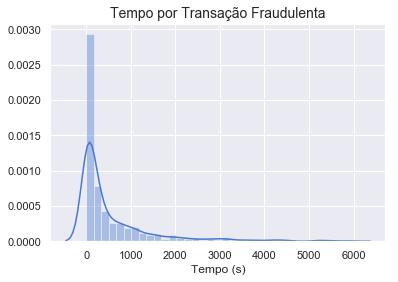

In [24]:
# Distribuição
fig, ax = plt.subplots()
ax = sns.distplot(time_fraud_series)
ax.set_title('Tempo por Transação Fraudulenta', size=14)
ax.set_xlabel('Tempo (s)')
plt.show()

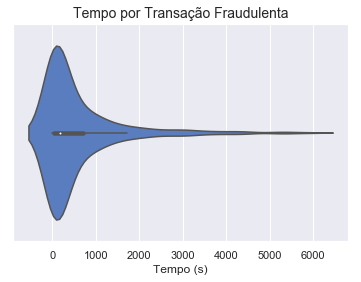

In [25]:
# Violin plot
fig, ax = plt.subplots()
ax = sns.violinplot(time_fraud_series)
ax.set_title('Tempo por Transação Fraudulenta', size=14)
ax.set_xlabel('Tempo (s)')
plt.show()

In [26]:
# Qual a moda?
time_fraud_series.mode()[0]

1

In [27]:
# Comunicando
print(f'Intervalo mais comum entre transações fraudulentas: \n\
{time_fraud_series.mode()[0]} segundo(s)')

Intervalo mais comum entre transações fraudulentas: 
1 segundo(s)


In [28]:
# Procurando mais insights
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

Será que, de alguma forma, transações fraudulentas são realizadas no mesmo segundo que transações normais? Hackers mal intencionados poderiam ter conhecimento sobre transações e, para dificultar a identificação das fraudes, estas seriam realizadas no mesmo instante que outras transações.

In [29]:
# Calculando intervalo entre fraudes
time_transactions_idx = list(df.index)
equal_time = []
for idx in range(len(df['Time'])):
    if idx == 0:
        pass
    elif df['Time'][idx] == df['Time'][idx-1]:
        equal_time.append(idx)

In [30]:
# Verificando
print(equal_time, end=',')

[1, 3, 5, 8, 11, 12, 15, 16, 23, 25, 27, 28, 29, 33, 34, 35, 37, 39, 41, 43, 45, 46, 47, 49, 50, 52, 53, 57, 60, 61, 62, 64, 66, 67, 68, 70, 71, 74, 76, 77, 79, 82, 86, 88, 90, 92, 95, 96, 98, 100, 101, 103, 104, 105, 109, 110, 111, 113, 114, 115, 118, 120, 121, 123, 124, 125, 128, 131, 133, 134, 136, 137, 139, 143, 145, 147, 148, 150, 152, 153, 154, 157, 159, 162, 163, 164, 166, 170, 172, 175, 178, 181, 183, 186, 188, 189, 191, 192, 195, 197, 200, 203, 204, 210, 211, 212, 213, 216, 220, 221, 222, 223, 225, 229, 231, 233, 235, 236, 238, 240, 243, 244, 246, 247, 251, 253, 256, 258, 260, 262, 267, 268, 269, 270, 274, 275, 277, 279, 280, 282, 284, 285, 288, 289, 291, 292, 293, 294, 297, 302, 303, 305, 307, 309, 310, 311, 313, 315, 319, 323, 325, 329, 330, 331, 335, 336, 342, 343, 346, 350, 351, 352, 354, 355, 359, 360, 361, 363, 364, 366, 369, 372, 375, 376, 381, 384, 385, 386, 388, 390, 391, 392, 393, 397, 398, 401, 402, 403, 405, 408, 410, 411, 412, 414, 417, 419, 423, 426, 428, 429, 43

O laço for demorou a ser executado. Estudar nova implementação com `list comprehension`.

De acordo com o resultado obtido, vamos verificar alguns exemplos de transações ocorridas no mesmo tempo para que possamos validar a implementação acima. Vamos visualizar os exemplos de índices 1, 3, 5, 8, 11 e 12, 15 e 16 e 23, com os índices anteriores.

In [31]:
# Visualizando transações que ocorreram ao mesmo tempo
idx_equal_test = [1, 3, 5, 8, 11, 12, 15, 16, 23]
idx_equal_prev = [x-1 for x in idx_equal_test]
idx_equal = np.unique(np.r_[idx_equal_prev + idx_equal_test])

df.iloc[idx_equal, np.r_[(0, -2, -1)]]

Time  Amount  Class
0    0.0  149.62      0
1    0.0    2.69      0
2    1.0  378.66      0
3    1.0  123.50      0
4    2.0   69.99      0
5    2.0    3.67      0
7    7.0   40.80      0
8    7.0   93.20      0
10  10.0    7.80      0
11  10.0    9.99      0
12  10.0  121.50      0
14  12.0   58.80      0
15  12.0   15.99      0
16  12.0   12.99      0
22  18.0    2.28      0
23  18.0   22.75      0

A implementação funcionou! Agora temos, através do objeto `equal_time` todas as transações ocorridas ao mesmo tempo. Vamos verificar qual a porcentagem de fraude delas.

In [32]:
# Visualizando transações que ocorreram ao mesmo tempo
equal_time_prev = [x-1 for x in equal_time]
idx_equal = np.unique(np.r_[equal_time_prev + equal_time])

equal_time_transactions = df.iloc[idx_equal, :]
equal_time_transactions.head(6)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   
5  0.260314 -0.568671  ...   -0.208254 -0.559825 -0.026398 -0.371427   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  
5 -0.232794  0.105915  0.253844  0.081080    3.67      0  

[6 rows x 31 columns]

In [33]:
# Verificando quantidade
equal_time_transactions.shape[0]

239644

In [34]:
# Comparando com o original
df.shape

(284807, 31)

A conclusão é que muitas transações foram realizadas ao mesmo tempo. Se analisarmos somente da segunda transação ao mesmo tempo pra frente, talvez possamos tirar insights mais relevantes.

In [35]:
# Verificando
equal_time_second_transactions = df.iloc[equal_time, :]
equal_time_second_transactions.shape[0]

160215

In [36]:
# Dentro dessas, quantas são fraudes?
equal_time_second_transactions.query('Class==1').shape[0]

248

Nada que nos permita extrair relevantes informações.

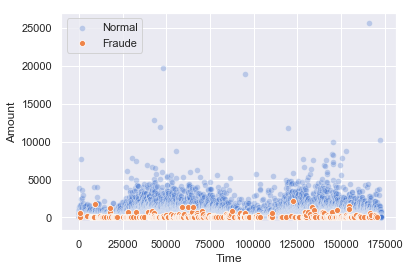

In [37]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='Time', y='Amount', data=df, alpha=.3, label='Normal')
ax = sns.scatterplot(x='Time', y='Amount', data=fraud_transactions, label='Fraude')
plt.legend()
plt.show()

### Valores Iguais

Transações com valores repetidos podem estar relacionadas com fraude? Com que frequência ocorrem?

In [38]:
# Ordenando dataframe por valor transacional
ordered_value = df.sort_values('Amount')
ordered_value.head(10)

Time        V1        V2        V3        V4        V5        V6  \
15816    27255.0  1.248804  0.047208  0.423388 -0.139515 -0.592217 -0.980654   
77470    57062.0 -1.188664 -0.612034  2.422204 -0.812786  0.318493 -0.671637   
190885  129019.0  1.868263  0.273764 -0.288023  3.835852  0.268329  0.817380   
87335    61640.0 -0.848470  1.426562  2.137094  2.852036 -0.366945  1.158146   
174481  121931.0 -1.184195  0.804518  2.240498  2.853175  1.038068  0.171728   
261840  160203.0  2.037530 -0.068534 -1.566791  0.125108  0.301918 -0.714361   
60681    49446.0  1.051131  0.078365  1.371753  2.662810 -0.347892  1.390227   
115131   73758.0 -0.956441  1.002075  0.870574 -1.475914  0.029941 -0.326977   
190894  129024.0  1.895858  0.300037 -0.177958  4.044251 -0.037868  0.200553   
115136   73760.0 -0.907995  0.758230  1.819020 -0.545179 -0.795851 -0.063335   

              V7        V8        V9  ...         V21       V22       V23  \
15816  -0.042416 -0.123044 -0.088962  ...   -0.166215 -0.501598  0.124995   
77470  -0.432053  0.068237  0.684183  ...    0.002347  0.164823 -0.096075   
190885 -0.287993  0.203258 -0.504927  ...    0.115927  0.610472  0.024259   
87335  -0.416142  0.812490 -0.688381  ...   -0.210710 -0.369433 -0.271748   
174481  0.457665  0.290123 -1.100519  ...    0.110209  0.254591 -0.475647   
261840  0.170216 -0.085433  0.395596  ...   -0.102592 -0.344140  0.281242   
60681  -0.742831  0.466555  0.100451  ...    0.087428  0.652637 -0.161363   
115131  0.266672  0.654644 -0.463467  ...   -0.091851 -0.389564 -0.016400   
190894 -0.202884  0.041879 -0.178301  ...    0.073807  0.488633  0.078707   
115136 -0.258224  0.642900  0.517573  ...    0.183969  0.939407 -0.090921   

             V24       V25       V26       V27       V28  Amount  Class  
15816   0.594070  0.119626  0.816501 -0.089465 -0.004055     0.0      0  
77470   0.393014 -0.608295  0.745069 -0.230070 -0.018679     0.0      0  
190885 -0.454322  0.117948  0.144547 -0.002638 -0.061637     0.0      0  
87335  -0.571453  0.232587  0.273226  0.248532  0.088226     0.0      0  
174481 -0.046345  0.888929  0.225662 -0.007746  0.057191     0.0      0  
261840  0.634925 -0.084306 -0.536669 -0.044266 -0.062104     0.0      0  
60681  -0.230979  0.584717  0.242936  0.066086  0.011721     0.0      0  
115131 -0.296194 -0.389571  0.693608  0.128017  0.092436     0.0      0  
190894 -0.028500  0.098306  0.137917 -0.005373 -0.048734     0.0      0  
115136  0.541961 -0.398305  1.008075  0.244808  0.148367     0.0      0  

[10 rows x 31 columns]

In [39]:
# Indexando dataframe apenas com amostras de valores duplicados
bool_mask = ordered_value['Amount'].duplicated(keep=False)
duplicated_amount = ordered_value[bool_mask]
duplicated_amount.head()

Time        V1        V2        V3        V4        V5        V6  \
15816    27255.0  1.248804  0.047208  0.423388 -0.139515 -0.592217 -0.980654   
77470    57062.0 -1.188664 -0.612034  2.422204 -0.812786  0.318493 -0.671637   
190885  129019.0  1.868263  0.273764 -0.288023  3.835852  0.268329  0.817380   
87335    61640.0 -0.848470  1.426562  2.137094  2.852036 -0.366945  1.158146   
174481  121931.0 -1.184195  0.804518  2.240498  2.853175  1.038068  0.171728   

              V7        V8        V9  ...         V21       V22       V23  \
15816  -0.042416 -0.123044 -0.088962  ...   -0.166215 -0.501598  0.124995   
77470  -0.432053  0.068237  0.684183  ...    0.002347  0.164823 -0.096075   
190885 -0.287993  0.203258 -0.504927  ...    0.115927  0.610472  0.024259   
87335  -0.416142  0.812490 -0.688381  ...   -0.210710 -0.369433 -0.271748   
174481  0.457665  0.290123 -1.100519  ...    0.110209  0.254591 -0.475647   

             V24       V25       V26       V27       V28  Amount  Class  
15816   0.594070  0.119626  0.816501 -0.089465 -0.004055     0.0      0  
77470   0.393014 -0.608295  0.745069 -0.230070 -0.018679     0.0      0  
190885 -0.454322  0.117948  0.144547 -0.002638 -0.061637     0.0      0  
87335  -0.571453  0.232587  0.273226  0.248532  0.088226     0.0      0  
174481 -0.046345  0.888929  0.225662 -0.007746  0.057191     0.0      0  

[5 rows x 31 columns]

In [40]:
# Quantas amostras com valores duplicados?
duplicated_amount.shape[0]

268843

In [41]:
# Quantas são fraudes?
duplicated_amount.query('Class==1').shape[0]

431

Também não é possivel tirar insights significantes dessa análise, dado que transações com valores duplicados não são tão incomuns, especialmente quando estamos falando de baixos valores.

### Valores Acima da Média

In [42]:
# Retirando transações sem valor

# Analisando valores que superam a média
mean_amount = df['Amount'].mean()
high_amount = df.query('Amount > @mean_amount')
high_amount.head()

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   

          V7        V8        V9  ...         V21       V22       V23  \
0   0.239599  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474   
2   0.791461  0.247676 -1.514654  ...    0.247998  0.771679  0.909412   
3   0.237609  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321   
8   0.370145  0.851084 -0.392048  ...   -0.073425 -0.268092 -0.204233   
12 -0.689405 -0.227487 -2.094011  ...   -0.231809 -0.483285  0.084668   

         V24       V25       V26       V27       V28  Amount  Class  
0   0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
2  -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50      0  
8   1.011592  0.373205 -0.384157  0.011747  0.142404   93.20      0  
12  0.392831  0.161135 -0.354990  0.026416  0.042422  121.50      0  

[5 rows x 31 columns]

In [43]:
# Qual a média?
mean_amount

88.34961925087359

In [44]:
# Quantas transações acima da média?
len(high_amount)

64407

In [45]:
# Quantas delas são fraudes?
high_amount.query('Class==1').shape[0] / len(high_amount)

0.0025463070784231528

A proporção do dataset original se mantém.

## Normalização

Em nosso conjunto de dados, temos 28 features resultantes de um procedimento de PCA para redução de dimensionalidade, sendo estas já normalizadas. As features `Time` e `Amount` são as únicas que necessitam de normalização.

In [53]:
# Importando normalizados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  0.244964      0  
1  0.167170  0.125895 -0.008983  0.014724 -0.342475      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  1.160686      0  
3  0.647376 -0.221929  0.062723  0.061458  0.140534      0  
4 -0.206010  0.502292  0.219422  0.215153 -0.073403      0  

[5 rows x 31 columns]

Pelo entendimento do problema, a coluna `Time` não oferece grandes informações a respeito do problema e, portanto, vamos dropa-la do dataset.

In [56]:
# Eliminando coluna Time
df.drop(['Time'], inplace=True, axis=1)
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...         V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...   -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ...   -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...    0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ...   -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...   -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964      0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475      0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686      0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534      0  
4  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403      0  

[5 rows x 30 columns]

## Reamostragem

Como já visto e provado, temos um conjunto de dados totalmente desbalanceado, contendo apenas 0,17% de amostras da classe positiva (fraude). Para este tipo de problema, vamos adotar algumas ações:

* Utilizar métricas como  `precision`, `recall`, `f1_score` e `ROC Curve`.
* Aplicar uma reamostragem (`resampling`), transformando os dados (`undersampling` ou `oversampling`) de modo a obter uma porcentagem de 50-50 entre as classes positiva e negativa.

In [62]:
# Indexando dataframe (já fizemos isso antes)
fraud_transactions = df.query('Class == 1')
normal_transactions = df.query('Class == 0')

# Retornando quantidade de fraudes
total_fraud = fraud_transactions.shape[0]
print(f'Total de transações fraudulentas: {total_fraud}')

Total de transações fraudulentas: 492


In [69]:
# Escolhendo aleatoriamente 492 amostras de transações normais
rnd_normal_idx = np.random.choice(normal_transactions.index, total_fraud, 
                                  replace=False)
rnd_normal_idx[:5]

array([ 95410, 166472, 206673, 224652, 136693], dtype=int64)

In [71]:
# Juntando os dois conjuntos de índices e criando um novo dataset
under_sample_idx = np.concatenate([fraud_transactions.index, rnd_normal_idx])
new_df = df.iloc[under_sample_idx, :]
new_df.head()

V1        V2        V3        V4        V5        V6        V7  \
541  -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623  -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6108 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6329  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   

            V8        V9       V10  ...         V21       V22       V23  \
541   1.391657 -2.770089 -2.772272  ...    0.517232 -0.035049 -0.465211   
623  -0.067794 -0.270953 -0.838587  ...    0.661696  0.435477  1.375966   
4920 -0.399147 -0.238253 -1.525412  ...   -0.294166 -0.932391  0.172726   
6108 -0.248778 -0.247768 -4.801637  ...    0.573574  0.176968 -0.436207   
6329 -0.496358 -1.282858 -2.447469  ...   -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28    Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276 -0.353229      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  1.761758      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  0.606031      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573 -0.117342      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793 -0.349231      1  

[5 rows x 30 columns]

In [72]:
# Verificando quantidades de fraude e transações normais
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

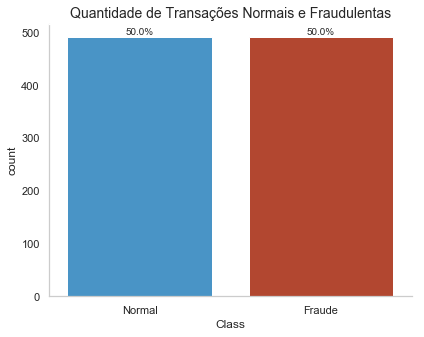

In [84]:
# Visualizando graficamente
custom_colors = ["#3498db", "#C8391A"]
fig, ax = plt.subplots()
ax = sns.countplot(x='Class', data=new_df,
                 palette=custom_colors)
format_spines(ax, right_border=False)
ax.set_title('Quantidade de Transações Normais e Fraudulentas', size=14)

ncount = len(new_df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.tight_layout()
plt.subplots_adjust(top=1.1)
ax.set_xticklabels(['Normal', 'Fraude'])
plt.show()

## Separando Dados

In [171]:
# Importando módulo
from sklearn.model_selection import train_test_split

Vamos aplicar duas abordagens diferentes: 

* Vamos separar os dados em Treino e Teste normalmente utilizando o dataset original;
* Vamos separar também os dados em Treino e Teste utilizando o dataset reamostrado (under)

### Dataset Original

In [174]:
# Separando
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Class'],
                                                   test_size=.20)

In [175]:
# Verificando
X_train.shape

(227845, 29)

In [176]:
# Proporções
print(f'Proporção de Fraudes nos dados de treino: \
{100 * y_train.value_counts()[1] / y_train.shape[0]:.2f}%')

print(f'\nProporção de Fraudes nos dados de teste: \
{100 * y_test.value_counts()[1] / y_test.shape[0]:.2f}%')

Proporção de Fraudes nos dados de treino: 0.18%

Proporção de Fraudes nos dados de teste: 0.15%


### Dataset Under-Sampled

In [86]:
# Dados reamostrados
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
                                                                new_df.iloc[:, :-1], 
                                                                new_df['Class'], 
                                                                test_size=.20
                                                                )

In [87]:
# Verificando proporções
X_train_under.shape

(787, 29)

In [88]:
# Classes em treino
y_train_under.value_counts()

1    395
0    392
Name: Class, dtype: int64

In [89]:
# Classes em teste
y_test_under.value_counts()

0    100
1     97
Name: Class, dtype: int64

In [90]:
# Proporções
print(f'Proporção de Fraudes nos dados de treino: \
{100 * y_train_under.value_counts()[1] / y_train_under.shape[0]:.2f}%')

print(f'\nProporção de Fraudes nos dados de teste: \
{100 * y_test_under.value_counts()[1] / y_test_under.shape[0]:.2f}%')

Proporção de Fraudes nos dados de treino: 50.19%

Proporção de Fraudes nos dados de teste: 49.24%


## Treinando Modelo

In [101]:
# Importando bibliotecas a serem utilizadas
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            precision_recall_curve, f1_score, confusion_matrix, roc_curve, \
                            roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Regressão Logística

Em um primeiro momento, vamos abordar nosso problema a partir do Undersampling aplicado.

In [102]:
# Treinando Regressão Logística
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
def plot_roc_curve(fpr, tpr, y, y_scores, auc, label=None):
    """docstring for plot_roc_curve:
    function responsible for plot the ROC curve of a model
    
    input:
        fpr: false positive rate
        tpr: true positive rate"""
    
    # Showing data
    sns.set(style='white', palette='muted', color_codes=True)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.02, 1.02, -0.02, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC: {auc:.4f}', size=13)

# Plotando curva
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.title('Precision versus Recall - Thresholds', size=13)
    plt.legend(loc='center left')
    plt.ylim([0, 1])
    
# Definindo função
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.title('Precision versus Recall', fontsize=13)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([0, 1, 0, 1])

In [216]:
# Create a confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    """if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    print(cm)"""

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [245]:
# Criando função para analisar dados antes da definição do threshold
def model_first_analysis(model, X, y, cv=5):
    """docstring for model_first_analysis
    função responsável por calcular insumos e plotar gráficos referentes a análise de
    métricas do modelo como Precisão, Recall e ROC curve
    input:
        model: modelo treinado
        X: features;
        y: label"""
    
    # Calculando predições
    y_pred = model.predict(X)
    
    # Cross Validation
    mean_acc_score = cross_val_score(model, X, y, cv=5, 
                                     scoring='accuracy').mean()
    mean_prec_score = cross_val_score(model, X, y, cv=5, 
                                      scoring='precision').mean()
    mean_rec_score = cross_val_score(model, X, y, cv=5, 
                                     scoring='recall').mean()
    mean_f1_score = cross_val_score(model, X, y, cv=5, 
                                     scoring='f1').mean()
    
    # Calculando scores e Area Under the Curve
    try:
        y_scores = cross_val_predict(model, X, y, cv=5, method='decision_function')
    except:
        # Trata-se de uma Árvore de Decisão que não possui o método "decision_function"
        y_probas = cross_val_predict(model, X, y, cv=5, method='predict_proba')
        y_scores_tree = y_probas[:, 1]
        y_scores = y_scores_tree
    
    # Calculando FPrate, TPrate, thresholds e AUC
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    auc = roc_auc_score(y, y_scores)
    
    # Configurando e iniciando plotagens
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plot_roc_curve(fpr, tpr, y, y_scores, auc)
    
    # Plotando curva Precision x Recall
    precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
    plt.subplot(2, 2, 2)
    plot_precision_vs_recall(precisions, recalls)
    
    # Plotando curva envolvendo Threshold
    plt.subplot(2, 1, 2)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    model_name = model.__class__.__name__
    plt.suptitle(model_name, y=1.025)
    plt.tight_layout()
    plt.show()
    
    """# Matriz de confusão
    cf_mx = confusion_matrix(y, y_pred)
    plt.subplot(2, 2, 1)
    labels = ['No Fraud', 'Fraud']
    plot_confusion_matrix(cf_mx, labels, 
                      title=model_name + '\n Confusion Matrix')"""
    
    # Salvando performances no dicionário de armazenamento
    performances = {}
    
    
    return performances

In [246]:
# Vamos criar um dataset para armazenar o progresso de cada modelo
def create_dataset():
    """
    Função para criação (primeira vez) de um dataset vazio para armazenar acurácias
    """
    attributes = ['auc', 'acc', 'prec', 'rec', 'f1']
    model_performance = pd.DataFrame({})
    for col in attributes:
        model_performance[col] = []
    return model_performance

In [247]:
# Criando dataframe
model_performance = create_dataset()
model_performance

Empty DataFrame
Columns: [auc, acc, prec, rec, f1]
Index: []

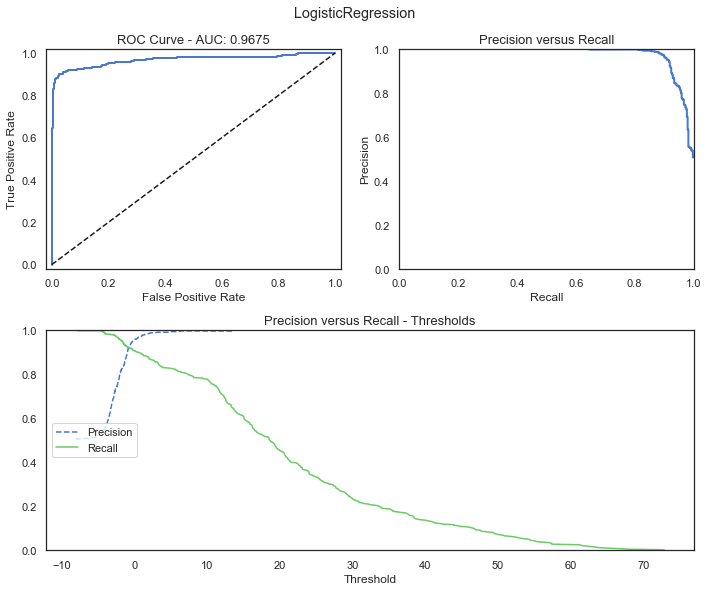

auc     acc    prec     rec      f1
log_reg  0.9675  0.9326  0.9557  0.9089  0.9089

In [248]:
# Visualizando dados e salvando performances
performances = model_first_analysis(log_reg, X_train_under, y_train_under)
model_performance = model_perfobrmance.append(performances, ignore_index=True)
model_performance.index = ['log_reg']
model_performance

### Decision Trees

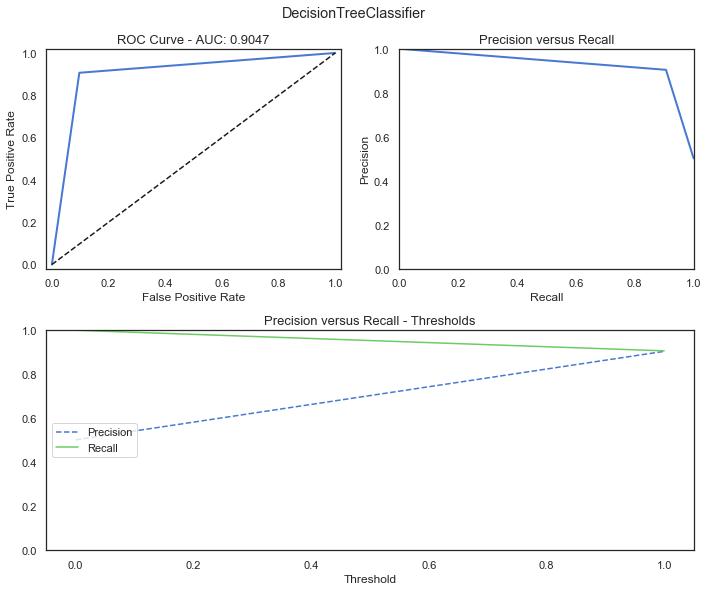

auc     acc    prec     rec      f1
log_reg   0.9675  0.9326  0.9557  0.9089  0.9089
tree_clf  0.9047  0.8996  0.9075  0.9038  0.9013

In [249]:
# Treinando Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_under, y_train_under)

# Visualizando dados e salvando performances
performances_tree = model_first_analysis(tree_clf, X_train_under, y_train_under)
model_performance = model_performance.append(performances_tree, ignore_index=True)
model_performance.index = ['log_reg', 'tree_clf']
model_performance

### Random Forest

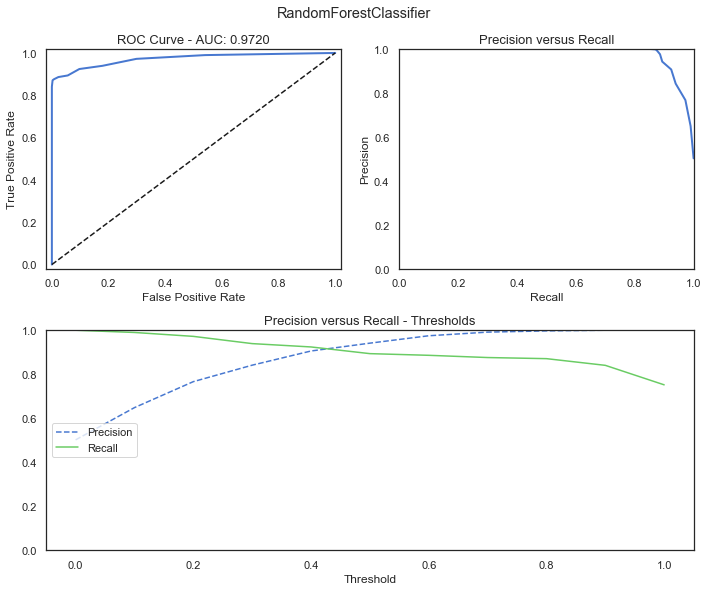

auc     acc    prec     rec      f1
log_reg     0.9675  0.9326  0.9557  0.9089  0.9089
tree_clf    0.9047  0.8996  0.9075  0.9038  0.9013
forest_clf  0.9720  0.9351  0.9601  0.9013  0.8886

In [250]:
# Treinando Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_under, y_train_under)

# Visualizando dados e salvando performances
performances_forest = model_first_analysis(forest_clf, X_train_under, y_train_under)
model_performance = model_performance.append(performances_forest, ignore_index=True)
model_performance.index = ['log_reg', 'tree_clf', 'forest_clf']
model_performance

### SVC Classifier

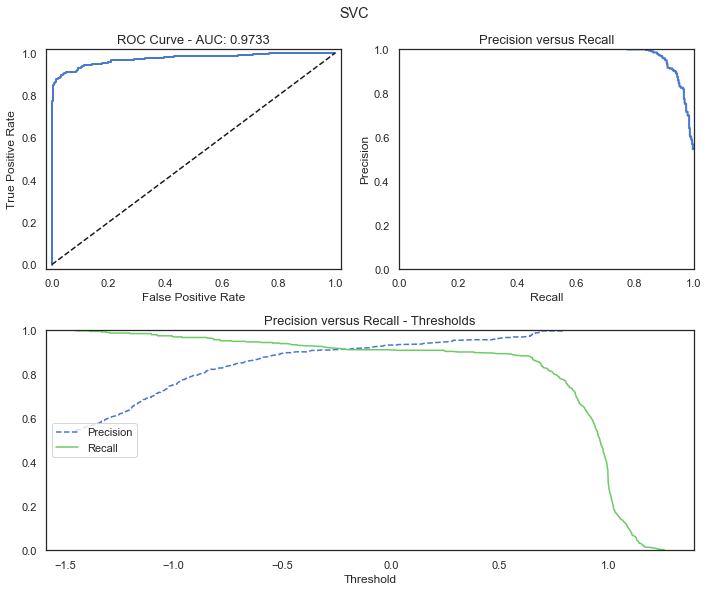

auc     acc    prec     rec      f1
log_reg     0.9675  0.9326  0.9557  0.9089  0.9089
tree_clf    0.9047  0.8996  0.9075  0.9038  0.9013
forest_clf  0.9720  0.9351  0.9601  0.9013  0.8886
svm_clf     0.9733  0.9212  0.9326  0.9089  0.9089

In [251]:
# Treinando Árvore de Decisão
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_under, y_train_under)

# Visualizando dados e salvando performances
performances_svc = model_first_analysis(svc, X_train_under, y_train_under)
model_performance = model_performance.append(performances_svc, ignore_index=True)
model_performance.index = ['log_reg', 'tree_clf', 'forest_clf', 'svm_clf']
model_performance

### KNN Classifier

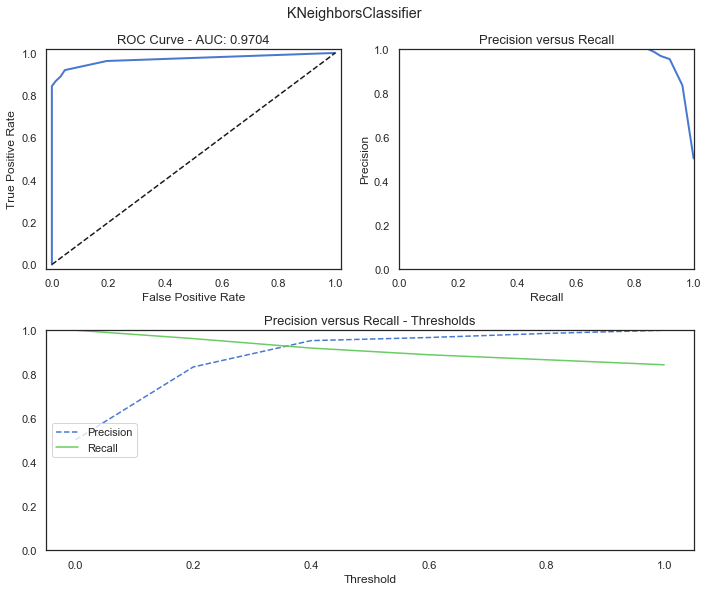

auc     acc    prec     rec      f1
log_reg     0.9675  0.9326  0.9557  0.9089  0.9089
tree_clf    0.9047  0.8996  0.9075  0.9038  0.9013
forest_clf  0.9720  0.9351  0.9601  0.9013  0.8886
svm_clf     0.9733  0.9212  0.9326  0.9089  0.9089
knn_clf     0.9704  0.9288  0.9672  0.8886  0.8886

In [252]:
# Treinando Árvore de Decisão
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_under, y_train_under)

# Visualizando dados e salvando performances
performances_knn = model_first_analysis(knn_clf, X_train_under, y_train_under)
model_performance = model_performance.append(performances_knn, ignore_index=True)
model_performance.index = ['log_reg', 'tree_clf', 'forest_clf', 'svm_clf', 'knn_clf']
model_performance

### MLP Classifier

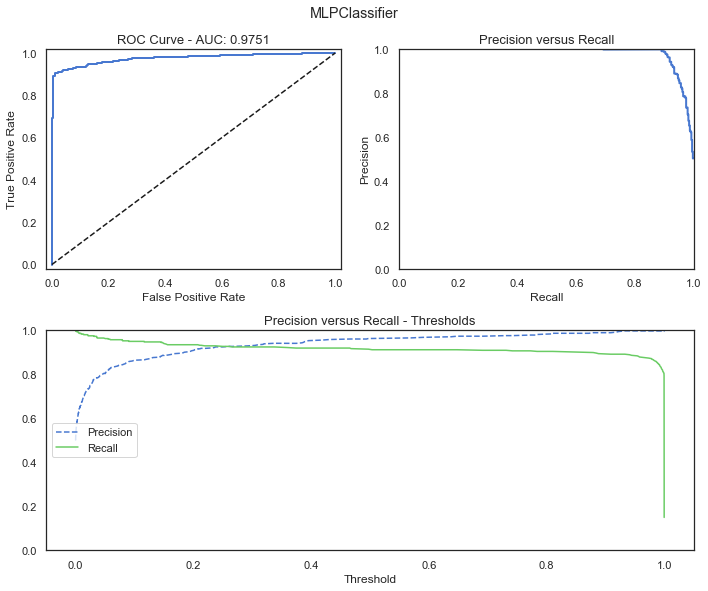

auc     acc    prec     rec      f1
log_reg     0.9675  0.9326  0.9557  0.9089  0.9089
tree_clf    0.9047  0.8996  0.9075  0.9038  0.9013
forest_clf  0.9720  0.9351  0.9601  0.9013  0.8886
svm_clf     0.9733  0.9212  0.9326  0.9089  0.9089
knn_clf     0.9704  0.9288  0.9672  0.8886  0.8886
mlp_clf     0.9751  0.9339  0.9632  0.9139  0.9114

In [253]:
# Treinando Árvore de Decisão
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_under, y_train_under)

# Visualizando dados e salvando performances
performances_mlp = model_first_analysis(mlp_clf, X_train_under, y_train_under)
model_performance = model_performance.append(performances_mlp, ignore_index=True)
model_performance.index = ['log_reg', 'tree_clf', 'forest_clf', 'svm_clf', 
                           'knn_clf', 'mlp_clf']
model_performance

Entre os algoritmos testados nos dados under-sampled, temos o `MLPClassifier` como o mais podereoso, apresentando um bom valor para a área abaixo da curva ROC (auc) e também um bom valor para `recall`, métrica mais interessante para este caso (queremos identificar toda e qualquer tipo de fraude, mesmo que a custo de um aumento dos FP). Entretanto, o tempo de treinamento foi o maior entre todos.

O modelo `LogisticRegression` apresento bons resultados, principalmente se avaliados os scores `recall` e `f1_score`. Em um primeiro momento, vamos utilizar o modelo de Regressão Logística para as análises futuras, incluindo sua utilização em todo o conjunto de dados, mas antes, vamos avaliar as ROC Curves de todos os modelos.

### Confusion Matrix

#### Treino Under Sampling

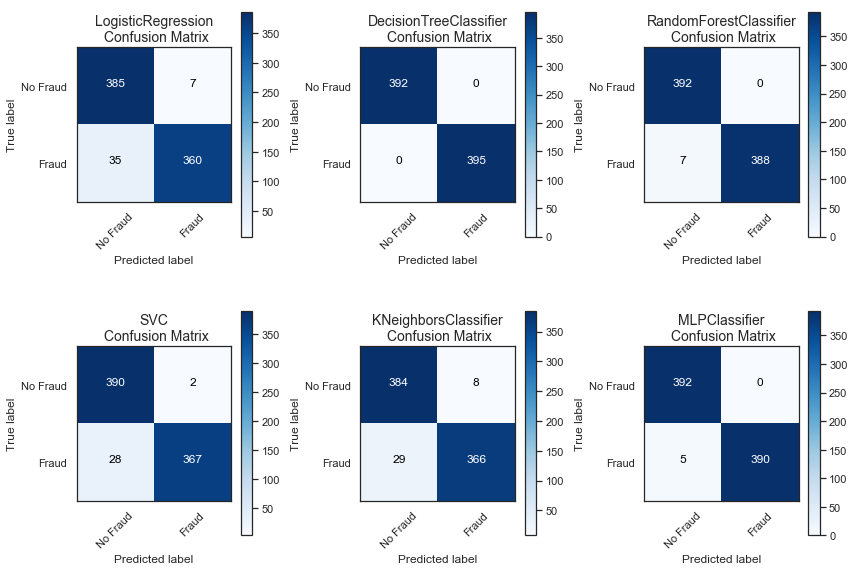

In [261]:
# Calculando predições com dados de treino
train_pred_reg = log_reg.predict(X_train_under)
train_pred_tree = tree_clf.predict(X_train_under)
train_pred_forest = forest_clf.predict(X_train_under)
train_pred_svc = svc.predict(X_train_under)
train_pred_knn = knn_clf.predict(X_train_under)
train_pred_mlp = mlp_clf.predict(X_train_under)

# Calculando matrizes de confusão
cf_mx_reg = confusion_matrix(y_train_under, train_pred_reg)
cf_mx_tree = confusion_matrix(y_train_under, train_pred_tree)
cf_mx_forest = confusion_matrix(y_train_under, train_pred_forest)
cf_mx_svc = confusion_matrix(y_train_under, train_pred_svc)
cf_mx_knn = confusion_matrix(y_train_under, train_pred_knn)
cf_mx_mlp = confusion_matrix(y_train_under, train_pred_mlp)

# Plotando matriz de confusão
plt.figure(figsize=(12, 12))
plt.subplot(3, 3, 1)
labels = ['No Fraud', 'Fraud']
model_name = log_reg.__class__.__name__
plot_confusion_matrix(cf_mx_reg, labels, 
                      title=model_name + '\n Confusion Matrix')

plt.subplot(3, 3, 2)
model_name = tree_clf.__class__.__name__
plot_confusion_matrix(cf_mx_tree, labels, 
                      title=model_name + '\n Confusion Matrix')

plt.subplot(3, 3, 3)
model_name = forest_clf.__class__.__name__
plot_confusion_matrix(cf_mx_forest, labels, 
                      title=model_name + '\n Confusion Matrix')

plt.subplot(3, 3, 4)
model_name = svc.__class__.__name__
plot_confusion_matrix(cf_mx_svc, labels, 
                      title=model_name + '\n Confusion Matrix')

plt.subplot(3, 3, 5)
model_name = knn_clf.__class__.__name__
plot_confusion_matrix(cf_mx_knn, labels, 
                      title=model_name + '\n Confusion Matrix')

plt.subplot(3, 3, 6)
model_name = mlp_clf.__class__.__name__
plot_confusion_matrix(cf_mx_mlp, labels, 
                      title=model_name + '\n Confusion Matrix')

plt.tight_layout()

In [254]:
train_pred = log_reg.predict(X_train_under)
cf_mx = confusion_matrix(y_train_under, train_pred)
cf_mx

array([[385,   7],
       [ 35, 360]], dtype=int64)

Confusion matrix, without normalization
[[385   7]
 [ 35 360]]


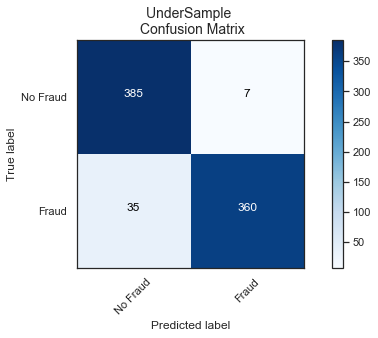

In [191]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
labels = ['No Fraud', 'Fraud']
plot_confusion_matrix(cf_mx, labels, 
                      title="UnderSample \n Confusion Matrix", cmap=plt.cm.Blues)